In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from typing import List

In [8]:
def euclidian_distance(data_point, centroids: np.ndarray):
    return np.sqrt(np.sum((centroids-data_point)**2, axis=1))

ari=1.0


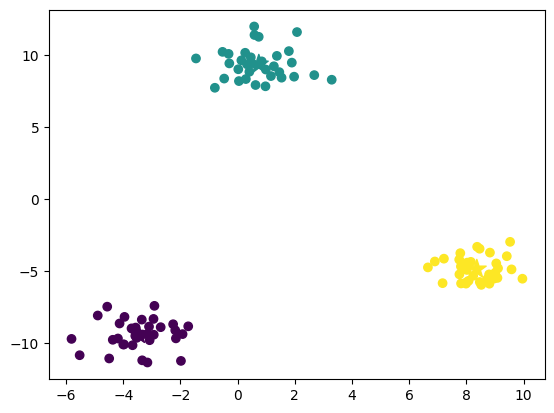

In [116]:
def fit(X, max_iterations: int = 200, k=3):
    # initialize centroids with random values within each axis boundaries
    centroids: np.ndarray = np.random.uniform(
        np.amin(X, axis=0), np.amax(X, axis=0), size=(k, X.shape[1])
    )

    for _ in range(max_iterations):
        y = []
        # for each data point in our dataset, calculate distance between
        # data point and each centroid
        for data_point in X:
            distances = euclidian_distance(data_point=data_point, centroids=centroids)
            # for each data point, get the index of the centroid closest to it
            cluster_num = np.argmin(distances)
            y.append(cluster_num)
        y = np.asarray(y)

        # builds a list of arrays, one per cluster, with the indices of their corresponding data points
        cluster_indices: List[np.ndarray] = [np.argwhere(y == i) for i in range(k)]

        # calculate new centroids for the next iteration
        # adds the mean of the data points in the cluster as the new centroid for the cluster
        # if the cluster has no data points, just add the previous centroid as the new centroid
        cluster_centers = [
            np.mean(X[indices], axis=0)[0] if len(indices) > 0 else centroids[i]
            for i, indices in enumerate(cluster_indices)
        ]

        if (
            np.max(centroids - np.array(cluster_centers)) < 0.001
        ):  # if the new centroids are almost the same as the previous ones, the program finishes
            break
        else:
            centroids = np.asarray(cluster_centers)
    return y, centroids


# generate random data
data = make_blobs(n_samples=100, n_features=2, centers=3)
random_points: np.ndarray = data[0]

labels, centroids = fit(X=random_points)

ari = adjusted_rand_score(
    labels_true=data[1], labels_pred=labels
)  # data[1] contains the original labels
print(f"{ari=}")

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(
    centroids[:, 0], centroids[:, 1], c=range(len(centroids)), marker="*", s=200
)